K-means
====

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from kmeans import biKmeans
import kmeans 

In [43]:
data_pre = pd.read_csv("dataset.csv")

dataset_raw = pd.read_csv("data_pre_for_kmeans.csv")
dataset_raw = dataset_raw.astype(float)
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32405 entries, 0 to 32404
Data columns (total 9 columns):
stop_id                32405 non-null float64
arrival_delay          32405 non-null float64
departure_delay        32405 non-null float64
stop_lat               32405 non-null float64
stop_lon               32405 non-null float64
arrival_time_hour      32405 non-null float64
departure_time_hour    32405 non-null float64
line_id_label          32405 non-null float64
on_time                32405 non-null float64
dtypes: float64(9)
memory usage: 2.2 MB


In [44]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32405 entries, 0 to 32404
Data columns (total 16 columns):
stop_id                  32405 non-null int64
arrival_delay            32405 non-null int64
arrival_time             32405 non-null object
departure_delay          32405 non-null int64
departure_time           32405 non-null object
schedule_relationship    32405 non-null object
trip_id                  32405 non-null object
route_id                 32405 non-null object
timestamp                32405 non-null object
stop_name                32405 non-null object
stop_lat                 32405 non-null float64
stop_lon                 32405 non-null float64
line_id                  32405 non-null object
line_name                32405 non-null object
arrival_time_hour        32405 non-null int64
departure_time_hour      32405 non-null int64
dtypes: float64(2), int64(5), object(9)
memory usage: 4.0+ MB


In [45]:
dataset= dataset_raw.drop('stop_id',axis=1)

In [46]:
dataset.head()

,arrival_delay,departure_delay,stop_lat,stop_lon,arrival_time_hour,departure_time_hour,line_id_label,on_time
0,0.0,0.0,-33.883716,151.206534,9.0,9.0,4.0,1.0
1,48.0,48.0,-33.871409,151.094068,9.0,9.0,4.0,0.0
2,0.0,0.0,-33.883325,151.205834,9.0,9.0,4.0,1.0
3,215.0,185.0,-33.772611,151.081813,8.0,8.0,4.0,0.0
4,315.0,285.0,-33.772611,151.081813,8.0,8.0,4.0,0.0


In [47]:
from sklearn.preprocessing import StandardScaler
# the dimensions of dataset 
numFeat = dataset.shape[1]

# feature scaling
scaler = StandardScaler()
# scaler = MinMaxScaler(feature_range=(0, 1))
scaled_raw = scaler.fit_transform(dataset.values)
scaled_raw = pd.DataFrame(scaled_raw)
scaled_raw.columns = ['arrival_delay','departure_delay','stop_lon','stop_lat',
                      'line_id','arrival_time_hour','departure_time_hour','ont_time']
scaled_raw.shape[1]

8

In [48]:
scaled_raw.describe()

,arrival_delay,departure_delay,stop_lon,stop_lat,line_id,arrival_time_hour,departure_time_hour,ont_time
count,3.240500e+04,3.240500e+04,3.240500e+04,3.240500e+04,3.240500e+04,3.240500e+04,3.240500e+04,3.240500e+04
mean,-6.090340e-15,1.803676e-15,3.223021e-14,8.134473e-14,5.348421e-15,1.413438e-15,-2.664562e-14,-1.341355e-14
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-7.150658e-01,-7.959427e-01,-3.917980e+00,-2.982958e+00,-2.224545e+00,-2.222182e+00,-1.370733e+00,-6.605996e-01
25%,-7.150658e-01,-6.966654e-01,-4.643439e-01,-4.111189e-01,-6.860712e-01,-6.853062e-01,-1.050391e+00,-6.605996e-01
50%,-4.522682e-01,-4.716368e-01,-2.196510e-01,2.595894e-01,-1.732467e-01,-1.730142e-01,-8.936553e-02,-6.605996e-01
75%,2.605704e-01,2.597063e-01,2.772883e-01,6.210182e-01,8.524022e-01,8.515699e-01,5.513181e-01,1.513776e+00
max,3.883893e+00,3.936277e+00,3.842814e+00,2.561014e+00,1.707110e+00,1.705390e+00,1.832685e+00,1.513776e+00


<Figure size 432x288 with 0 Axes>

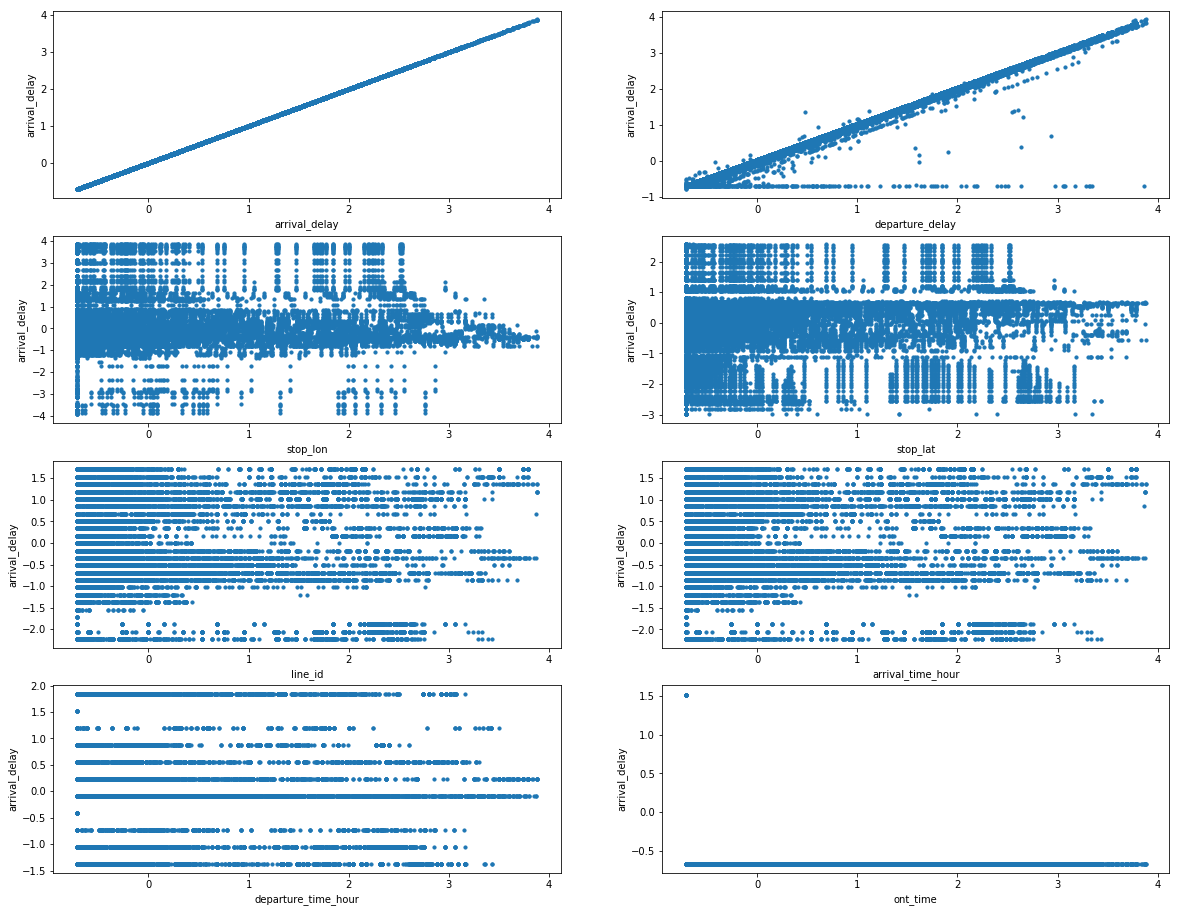

In [50]:
# group up all the graphs 
groups = [i for i in range(0, scaled_raw.shape[1])]
rows = 5
cols = 2
# draw map
# plot each column
plt.figure()
plt.subplots(figsize=(20, 20))
# pyplot.title(scaled_raw.columns[group], y=0.5, loc='right')
for group in groups:
    # pyplot.subplot(rows, group//cols + 1, group%cols + 1)
    plt.subplot(rows, cols, group + 1)
    plt.scatter(scaled_raw.values[:, [0]], scaled_raw.values[:, [group]], s=10)
    # pyplot.title(scaled_raw.columns[group], y=0.5, loc='right')
    plt.xlabel(scaled_raw.columns[group])
    plt.ylabel(scaled_raw.columns[0])
#plt.legend(loc='upper right')
plt.show()

In [9]:
covMat = np.cov(scaled_raw, rowvar=0)
dataDf = pd.DataFrame(covMat)
dataDf.to_excel('pca_cov.xls')

In [10]:
from sklearn.decomposition import PCA
# pca to reduce dimensionality
pca=PCA(n_components=5)
# return the reduce dimensionality
pcaMat = pca.fit_transform(scaled_raw)
# print(newMat)
pcaDf = pd.DataFrame(pcaMat)
pcaDf.to_csv('pcaDf.csv',index=False)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)

[0.30525079 0.28194574 0.16698822 0.1250596  0.0818411 ]
[2.44208168 2.25563554 1.33594697 1.00050766 0.65474902]
5


,Explained Variance,arrival_delay,departure_delay,stop_lat,stop_lon,arrival_time_hour,departure_time_hour,line_id_label,on_time
Dimension 1,0.3053,0.4497,0.4494,0.2839,0.1762,-0.4277,-0.4272,-0.1766,-0.2958
Dimension 2,0.2819,0.4297,0.4267,-0.2747,0.0161,0.4182,0.4181,0.3021,-0.3415
Dimension 3,0.1670,0.1327,0.1332,0.2510,-0.6161,0.2138,0.2151,-0.6541,0.0488
Dimension 4,0.1251,-0.0712,-0.0707,0.6709,0.5790,0.3065,0.3077,-0.1187,-0.0434
Dimension 5,0.0818,0.2947,0.3114,0.0090,0.1258,0.0214,0.0218,0.0886,0.8896


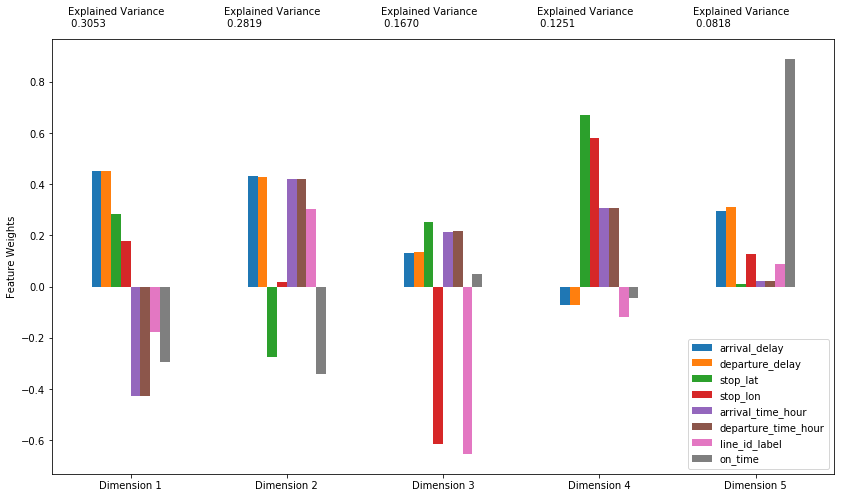

In [11]:
# Dimension indexing
dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
# PCA components
components = pd.DataFrame(np.round(pca.components_, 4), columns = dataset.keys()) 
components.index = dimensions
 # PCA explained variance
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
variance_ratios.index = dimensions

# Create a bar plot visualization
fig, ax = plt.subplots(figsize = (14,8))

# Plot the feature weights as a function of the components
components.plot(ax = ax, kind = 'bar')
ax.set_ylabel("Feature Weights") 
ax.set_xticklabels(dimensions, rotation=0)

# Display the explained variance ratios# 
for i, ev in enumerate(pca.explained_variance_ratio_): 
    ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

# Return a concatenated DataFrame
pd.concat([variance_ratios, components], axis = 1)

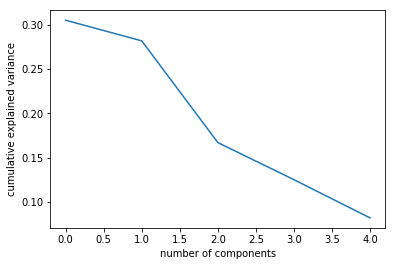

In [12]:
#Explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [13]:
from sklearn.cluster import KMeans
# K-means
# read the dataset after pac redure 
f2 = open('pcaDf.csv', encoding = 'UTF-8')
pca_series = pd.read_csv(f2, header=0)

X = pca_series
y_pred = KMeans(n_clusters=2, max_iter = 500).fit_predict(X)
X.head()

,0,1,2,3,4
0,-0.487575,-1.593858,-0.856705,-0.287464,0.959335
1,0.244692,-0.736911,-0.667224,-0.404298,-0.927649
2,-0.487511,-1.594371,-0.854779,-0.287707,0.959046
3,0.957856,-0.571402,-0.471505,-0.311665,-0.633557
4,1.254309,-0.289060,-0.383851,-0.358459,-0.433695


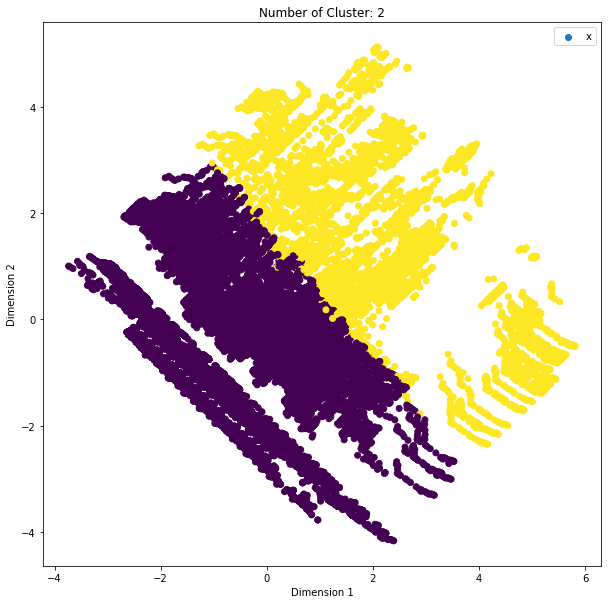

In [39]:
# 2D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_title('Number of Cluster: %d' % len(set(y_pred)))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred, marker = 'o')
plt.legend('x1')

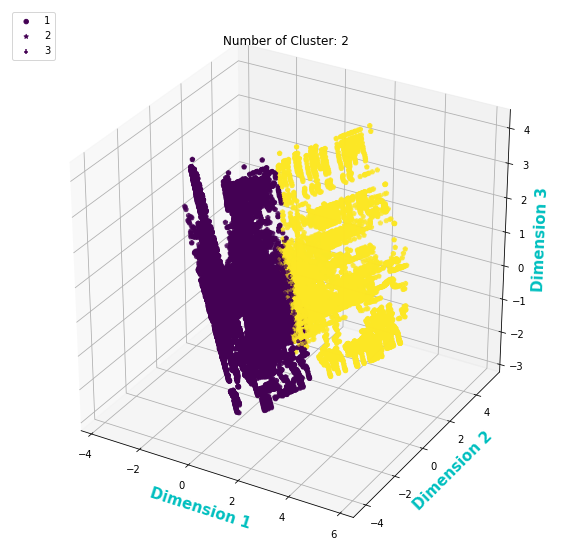

In [40]:
from mpl_toolkits.mplot3d import Axes3D
# 3D
label_font = {
    'color': 'c',
    'size': 15,
    'weight': 'bold'
}
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")  # 添加子坐标轴，111表示1行1列的第一个子图
for c, m, l in [('r', 'o', '1'),
                ('g', '*', '2'),
                ('b', '+', '3')]:
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=y_pred, marker=m, label=l)
ax.set_xlabel("Dimension 1", fontdict=label_font)
ax.set_ylabel("Dimension 2", fontdict=label_font)
ax.set_zlabel("Dimension 3", fontdict=label_font)
ax.set_title('Number of Cluster: %d' % len(set(y_pred)))
ax.legend(loc="upper left")    
plt.show()

In [16]:
# add the label and check out the cluster result
pred_label = y_pred.reshape((len(y_pred), 1))
pred_label = pd.DataFrame(pred_label)
site_name = pd.DataFrame(data_pre.iloc[:,9])
site_id = pd.DataFrame(dataset_raw.iloc[:,0])
site_line_id = pd.DataFrame(data_pre.iloc[:,12])
arrival_delay = pd.DataFrame(dataset_raw.iloc[:,1])
arrival_time_hour = pd.DataFrame(dataset_raw.iloc[:,-4])
# output the result 
result = pd.concat([site_name,site_id,site_line_id,arrival_delay, arrival_time_hour, pred_label], axis=1)
result.columns = ['stop_name','stop_id','line_id','arrival_delay', 'arrival_time_hour','result']
result.to_csv('kmeans_result.csv', encoding='utf_8_sig', index=False)

In [17]:
#pd.DataFrame(dataset_raw.iloc[:,-4])

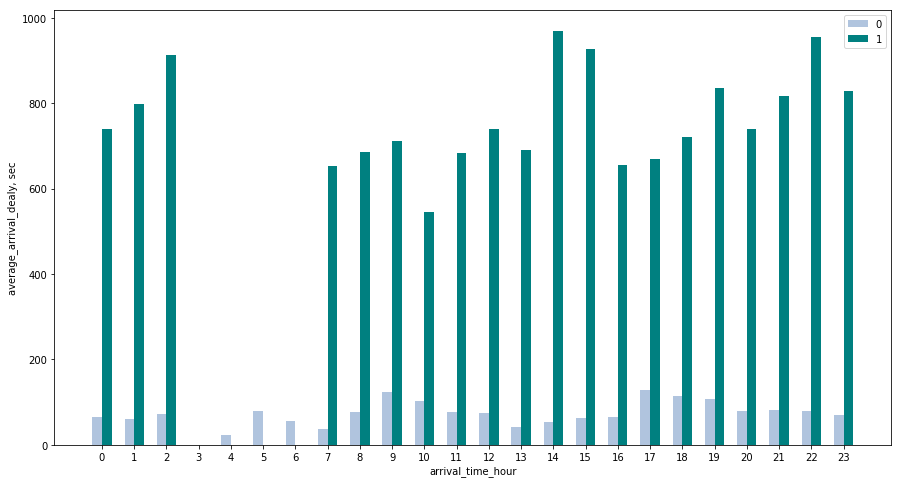

In [26]:
#pd.DataFrame(data_pre.iloc[:,12])
df_result = pd.read_csv("kmeans_result.csv")
fig = plt.figure(figsize=(15,8))

df_result_0=df_result[df_result['result']==0].groupby('arrival_time_hour',as_index=False).mean()
df_result_1=df_result[df_result['result']==1].groupby('arrival_time_hour',as_index=False).mean()

mywidth=0.3

plt.bar(df_result_0['arrival_time_hour']-0.5*mywidth, df_result_0['arrival_delay'], width=mywidth,align="center",color='lightsteelblue')
plt.bar(df_result_1['arrival_time_hour']+0.5*mywidth, df_result_1['arrival_delay'], width=mywidth,align="center",color='teal')
plt.xticks(df_result_0.arrival_time_hour)
plt.xlabel('arrival_time_hour')
plt.ylabel('average_arrival_dealy, sec')
plt.legend([0,1])
plt.show()

In [27]:
#df_result.loc[df_result['stop_name'].str.contains('Central Station, Platform 18')]

In [28]:
da = dataset_raw.iloc[:,1]
da.head()

0      0.0
1     48.0
2      0.0
3    215.0
4    315.0
Name: arrival_delay, dtype: float64

In [29]:
#evaluate the Performance of kmeans
from sklearn.metrics import silhouette_score
si_score=silhouette_score(X,y_pred,
                          metric='euclidean')
print('si_score: {:.4f}'.format(si_score))


si_score: 0.3006


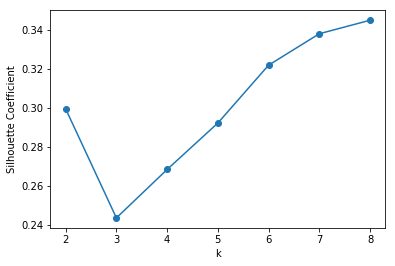

In [30]:
Scores = []  # 存放轮廓系数
for k in range(2,9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(X)
    Scores.append(silhouette_score(X,estimator.labels_,metric='euclidean'))
Y = range(2,9)
plt.xlabel('k')
plt.ylabel('Silhouette Coefficient')
plt.plot(Y,Scores,'o-')

In [51]:
# the first three dimenstions
Xk = pca_series.iloc[:,0:2]
dataMat = np.mat(Xk)
k = 8

[[2.24647522 3.00954962]
 [3.88455362 3.92616706]]
[[-0.0508188  -0.01185246]
 [ 4.64087114  1.08238981]]
[[-0.31640814 -0.10882059]
 [ 3.35462863  1.15373981]]
[[-0.4369547  -0.20333177]
 [ 2.68600894  1.2499029 ]]
[[-0.51765677 -0.31258647]
 [ 2.22419801  1.34307954]]
[[-0.55201008 -0.37003675]
 [ 2.01661237  1.35182438]]
[[-0.5672674  -0.387762  ]
 [ 1.94637953  1.33046958]]
[[-0.57572533 -0.39550385]
 [ 1.91311929  1.31424833]]
[[-0.58234982 -0.39853561]
 [ 1.8964425   1.29784512]]
[[-0.58694977 -0.39992362]
 [ 1.88704962  1.2857586 ]]
[[-0.58987238 -0.40028255]
 [ 1.88261687  1.27752835]]
[[-0.59210209 -0.40035093]
 [ 1.87982116  1.27104457]]
[[-0.59404496 -0.40008063]
 [ 1.87834483  1.26503788]]
[[-0.59555963 -0.3995706 ]
 [ 1.87805097  1.26001479]]
[[-0.59610182 -0.39930719]
 [ 1.87817504  1.25812198]]
[[-0.59681748 -0.39878347]
 [ 1.87884439  1.25541244]]
[[-0.59727562 -0.39853449]
 [ 1.8790187   1.25378256]]
[[-0.59742505 -0.39841969]
 [ 1.87917196  1.25321009]]
sseSplit, and 

[[-1.10640624  1.17036346]
 [-2.03129503 -0.02610229]]
[[-1.1020865   1.14366055]
 [-2.08014036 -0.03343907]]
[[-1.10080128  1.12972902]
 [-2.10598452 -0.03675459]]
[[-1.10060356  1.12489663]
 [-2.11486768 -0.03785568]]
[[-1.10033748  1.12270748]
 [-2.11892566 -0.03794608]]
[[-1.10032834  1.12187809]
 [-2.12043902 -0.03813107]]
[[-1.10025137  1.12148116]
 [-2.12118013 -0.03808495]]
sseSplit, and notSplit:  6809.964476369303 56219.45336543115
the bestCentToSplit is:  0
the len of bestClustAss is:  7817
[[ 4.00712872 -3.752122  ]
 [ 0.29440104  2.10988942]]
[[ 2.17131996 -1.83533784]
 [-0.24577462  0.20774436]]
[[ 1.83967774 -1.32651141]
 [-0.40131005  0.28936718]]
[[ 1.64025365 -0.95622128]
 [-0.58593246  0.34158198]]
[[ 1.48468145 -0.78233413]
 [-0.72245234  0.38068713]]
[[ 1.39220427 -0.70664893]
 [-0.79823948  0.40516689]]
[[ 1.32647535 -0.65718023]
 [-0.85237875  0.42229693]]
[[ 1.27531843 -0.62078939]
 [-0.89679834  0.43653639]]
[[ 1.24413321 -0.5966019 ]
 [-0.92655201  0.4443115 ]

[[ 4.67408002  3.48296357]
 [ 3.54013798 -0.55607027]]
[[ 1.35245701  3.15459544]
 [-0.11164299 -0.26040641]]
[[ 1.64363672  2.3157392 ]
 [-0.27205755 -0.3833051 ]]
[[ 1.87065122  1.80564445]
 [-0.43230649 -0.41728346]]
[[ 1.91099244  1.59532246]
 [-0.49547824 -0.41363197]]
[[ 1.9102907   1.49333138]
 [-0.52491662 -0.41034303]]
[[ 1.90672843  1.43330808]
 [-0.5423395  -0.40768238]]
[[ 1.90137371  1.38577942]
 [-0.55640343 -0.40552387]]
[[ 1.89785681  1.34974734]
 [-0.56717385 -0.40337152]]
[[ 1.89306861  1.3246581 ]
 [-0.57494267 -0.40231107]]
[[ 1.88812562  1.30436585]
 [-0.58138967 -0.40163897]]
[[ 1.88522222  1.28978778]
 [-0.58598146 -0.40090325]]
[[ 1.88275627  1.28108626]
 [-0.58881419 -0.4006476 ]]
[[ 1.88029143  1.27445045]
 [-0.59104679 -0.40060803]]
[[ 1.87875295  1.26682087]
 [-0.5934711  -0.40017053]]
[[ 1.87835655  1.26160857]
 [-0.59505334 -0.39967087]]
[[ 1.87817951  1.25845743]
 [-0.59600265 -0.39934626]]
[[ 1.87868235  1.25599658]
 [-0.59666536 -0.39890173]]
[[ 1.87901

[[ 2.95268605  0.03444712]
 [ 3.90974204 -0.29005786]]
sseSplit, and notSplit:  11109.495095888364 40419.68936257064


/Users/frankie/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:447: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
/Users/frankie/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[[ 0.21723044 -0.63710709]
 [-2.1995131   0.57536996]]
[[-0.43859022  0.39296861]
 [-1.69305887  0.78524415]]
[[-0.57322257  0.52651884]
 [-1.8201061   0.78792542]]
[[-0.64341231  0.62106943]
 [-1.88860076  0.76047443]]
[[-0.69099632  0.75815443]
 [-1.94984578  0.68357675]]
[[-0.75218931  0.86744767]
 [-2.00674758  0.59315705]]
[[-0.82560226  0.94168203]
 [-2.05841862  0.49686655]]
[[-0.91846391  1.01212814]
 [-2.11212307  0.35257151]]
[[-1.01123351  1.06536802]
 [-2.15053745  0.17091298]]
[[-1.09306133  1.10473764]
 [-2.15064199 -0.02368082]]
[[-1.10008784  1.11409625]
 [-2.13528793 -0.03884075]]
[[-1.10027073  1.11814135]
 [-2.12790501 -0.03848594]]
[[-1.10038772  1.12007912]
 [-2.12435592 -0.03830436]]
[[-1.10049597  1.12133652]
 [-2.12204769 -0.03822748]]
[[-1.10047768  1.12181648]
 [-2.12118013 -0.03808495]]
sseSplit, and notSplit:  6806.601118081325 31903.0797258799
[[ 0.06255084 -0.6521772 ]
 [ 2.08939264 -3.16125363]]
[[-0.132773   -0.99844561]
 [ 1.22518131 -2.71676983]]
[[-0.

[[ 0.39506428 -0.60708937]
 [-0.53361141 -1.68658002]]
[[ 0.39516281 -0.60741104]
 [-0.53398687 -1.68652479]]
sseSplit, and notSplit:  11909.674642269816 32416.670976161877
[[ 2.8602053   0.2934518 ]
 [ 2.82507788 -0.6604238 ]]
[[ 4.26014961  0.20145614]
 [ 3.4573766  -1.14180411]]
[[ 4.74971207 -0.2029033 ]
 [ 2.83168604 -1.26458614]]
[[ 4.89353118 -0.50840986]
 [ 2.39887672 -1.11230339]]
[[ 4.86832695 -0.60843115]
 [ 2.29542675 -1.03177261]]
[[ 4.84519849 -0.63137986]
 [ 2.25785384 -1.01541213]]
[[ 4.83780956 -0.63777425]
 [ 2.24697682 -1.0107003 ]]
[[ 4.83275643 -0.64129731]
 [ 2.23984912 -1.00835643]]
[[ 4.83150562 -0.64228853]
 [ 2.23804881 -1.00762765]]
[[ 4.82910029 -0.64500624]
 [ 2.23432709 -1.00526438]]
sseSplit, and notSplit:  1493.4562556340002 47442.510481897516
[[-3.26233499 -0.60114546]
 [-2.26630084 -0.43937659]]
[[-3.18117968  0.90193971]
 [-1.445071    0.71088041]]
[[-2.59683378  0.8045829 ]
 [-1.28016788  0.69799188]]
[[-2.35875518  0.66292578]
 [-1.09930877  0.73264

[[-1.09011446  1.25585593]
 [-1.83092715 -4.04360397]]
[[-0.01135246  0.32115479]
 [ 0.07573948 -2.14262857]]
[[-0.09675129  0.68060363]
 [ 0.23348103 -1.64243835]]
[[-0.22142609  0.93037225]
 [ 0.32551442 -1.36772308]]
[[-0.30737013  1.09051642]
 [ 0.34041402 -1.2077526 ]]
[[-0.37679362  1.19990288]
 [ 0.34646176 -1.10331077]]
[[-0.43157107  1.27128591]
 [ 0.35194961 -1.03674366]]
[[-0.47031036  1.31671939]
 [ 0.35514635 -0.99429679]]
[[-0.50735849  1.34035997]
 [ 0.36544248 -0.96544057]]
[[-0.53964746  1.35349833]
 [ 0.37649231 -0.94428632]]
[[-0.57570687  1.36247341]
 [ 0.39026326 -0.92360078]]
[[-0.59998201  1.36690007]
 [ 0.39957673 -0.91032972]]
[[-0.6204005   1.36306574]
 [ 0.41068362 -0.90230226]]
[[-0.64184377  1.36122825]
 [ 0.42089944 -0.89264745]]
[[-0.66178459  1.35725118]
 [ 0.43123935 -0.88442693]]
[[-0.677166    1.35564551]
 [ 0.43824925 -0.87734858]]
[[-0.69002002  1.35271237]
 [ 0.44477996 -0.87194477]]
[[-0.69591805  1.35017656]
 [ 0.44834948 -0.86985954]]
[[-0.69886

[[ 4.16247497 -1.61183482]
 [ 5.00817817 -0.17215017]]
[[ 3.97960492 -1.7836656 ]
 [ 4.99223373 -0.29284324]]
[[ 3.72574048 -1.95308576]
 [ 4.97981616 -0.4047632 ]]
[[ 3.65642385 -2.00375824]
 [ 4.96814788 -0.43353525]]
[[ 3.6549167  -2.00667587]
 [ 4.96708586 -0.43435034]]
sseSplit, and notSplit:  572.9801984363462 41552.30969984147
[[-1.07797025 -2.24275417]
 [ 0.69323472 -1.67306159]]
[[-0.90300319 -1.38360449]
 [ 0.3382685  -0.88746447]]
[[-0.82516331 -1.4404283 ]
 [ 0.37118258 -0.80081286]]
[[-0.77946922 -1.48770855]
 [ 0.36578599 -0.73988345]]
[[-0.72993102 -1.53696408]
 [ 0.34790808 -0.67509615]]
[[-0.68124597 -1.58905659]
 [ 0.31463463 -0.61420249]]
[[-0.66229941 -1.60639518]
 [ 0.3008283  -0.59289735]]
[[-0.65204589 -1.61054877]
 [ 0.2964851  -0.58279284]]
[[-0.64597298 -1.61175684]
 [ 0.2948719  -0.5768208 ]]
[[-0.64229439 -1.61234402]
 [ 0.29395948 -0.57320438]]
[[-0.64014253 -1.6125329 ]
 [ 0.29355404 -0.5710751 ]]
[[-0.63882501 -1.61284159]
 [ 0.29310549 -0.56979239]]
[[-0

[[ 4.96708586 -0.43435034]
 [ 3.6549167  -2.00667587]]
sseSplit, and notSplit:  572.9801984363462 29524.792138370725
[[ 1.71340367 -2.09263917]
 [-1.31348422 -2.54585552]]
[[ 0.86481263 -2.79919775]
 [-0.82668851 -1.46329932]]
[[ 0.52547409 -2.68512683]
 [-0.89620723 -1.37405557]]
[[ 0.37457613 -2.57770335]
 [-0.94378909 -1.32054708]]
[[ 0.27376613 -2.49506802]
 [-0.98219149 -1.27881099]]
[[ 0.23986222 -2.46386756]
 [-0.99700343 -1.26379704]]
[[ 0.21385816 -2.43767417]
 [-1.00926208 -1.25232453]]
[[ 0.19191683 -2.41607902]
 [-1.01980765 -1.24225772]]
[[ 0.17737568 -2.4011367 ]
 [-1.02737331 -1.2353392 ]]
[[ 0.16818169 -2.39178054]
 [-1.03217246 -1.23092079]]
[[ 0.16471435 -2.39008728]
 [-1.03308171 -1.22922102]]
[[ 0.16323436 -2.38825323]
 [-1.03401507 -1.22851482]]
[[ 0.16125486 -2.38599321]
 [-1.03517461 -1.22756253]]
sseSplit, and notSplit:  3019.8270711390455 23397.140521698795
[[ 3.40034815 -0.6485303 ]
 [ 3.77829107 -2.01347277]]
[[ 1.78049958  0.13653548]
 [ 1.98095745 -2.156358

[[1.26994111 4.44925447]
 [1.90981593 3.67879941]]
[[0.30850755 3.7010751 ]
 [2.08998731 0.91836902]]
[[0.7939993  3.13798146]
 [2.33145702 0.45957362]]
[[0.96497962 2.91183272]
 [2.43722238 0.23142485]]
[[1.01874227 2.77800585]
 [2.50922373 0.12672492]]
[[1.03934633 2.72153247]
 [2.54097182 0.08591091]]
[[1.0449256  2.69889548]
 [2.55485174 0.07197797]]
[[1.04716627 2.69672925]
 [2.55547479 0.06948265]]
[[1.04735049 2.69633869]
 [2.55567414 0.06919221]]
sseSplit, and notSplit:  19036.88417269601 31493.062273071526
[[-0.14959709  1.87641346]
 [-1.63448392  0.80664505]]
[[-0.55162005  1.40485979]
 [-1.63318404  0.58130835]]
[[-0.80966483  1.31129456]
 [-1.77044191  0.42785425]]
[[-0.98068457  1.26310658]
 [-1.87230453  0.24071808]]
[[-1.1017467   1.23299271]
 [-1.93424869  0.02636321]]
[[-1.10979535  1.18938604]
 [-1.99915863 -0.01873114]]
[[-1.10414846  1.15599165]
 [-2.0582319  -0.03019282]]
[[-1.1018863   1.13599241]
 [-2.09510057 -0.03571875]]
[[-1.1011042   1.12758503]
 [-2.1106857

[[2.65476094 1.20486606]
 [1.50966047 0.01580681]]
[[2.64714624 1.19654416]
 [1.50589328 0.01208427]]
[[2.64494895 1.19416598]
 [1.50483583 0.01103162]]
[[2.64355356 1.19215114]
 [1.50392907 0.01035182]]
[[2.64259648 1.19195386]
 [1.50385413 0.00990713]]
sseSplit, and notSplit:  1852.2290364831601 39433.77645041312
[[ 4.30914632 -3.07475971]
 [ 4.45606232 -0.25583198]]
[[ 3.49825372 -2.21369483]
 [ 4.85811098 -0.54313973]]
[[ 3.43872451 -2.08211282]
 [ 4.91879458 -0.52448704]]
[[ 3.47484236 -2.03491922]
 [ 4.93274921 -0.51250276]]
[[ 3.52367829 -1.99984232]
 [ 4.94364867 -0.49606433]]
[[ 3.57522377 -1.97299989]
 [ 4.95222175 -0.47749794]]
[[ 3.63112534 -1.94224432]
 [ 4.96258539 -0.45508865]]
[[ 3.68139274 -1.9245733 ]
 [ 4.96814788 -0.43353525]]
sseSplit, and notSplit:  540.3025852488768 41759.74533712189
the bestCentToSplit is:  2
the len of bestClustAss is:  14934
[[-0.34625044  3.50114528]
 [ 3.57869151  4.3621215 ]]
[[0.60847147 2.53711736]
 [2.39962739 3.18693248]]
[[0.48001159 2

[[ 2.51942393  1.11994472]
 [ 1.47189678 -0.05659694]]
[[ 2.53876111  1.13390076]
 [ 1.47821538 -0.04507239]]
[[ 2.54613304  1.13844908]
 [ 1.48024079 -0.040774  ]]
[[ 2.55012356  1.1413721 ]
 [ 1.48162311 -0.03841529]]
[[ 2.55376781  1.1418255 ]
 [ 1.48166666 -0.03639282]]
[[ 2.55825533  1.14341452]
 [ 1.48229484 -0.03386898]]
[[ 2.56364319  1.14613064]
 [ 1.48348998 -0.03083635]]
[[ 2.5687867   1.14913858]
 [ 1.48484824 -0.02796276]]
[[ 2.57339699  1.15172197]
 [ 1.48600199 -0.02542172]]
[[ 2.57566404  1.15257077]
 [ 1.48634932 -0.02419583]]
[[ 2.57652694  1.15373486]
 [ 1.48692626 -0.02369501]]
[[ 2.57828937  1.15407038]
 [ 1.48703014 -0.02275668]]
[[ 2.57918452  1.15521336]
 [ 1.48759253 -0.02224345]]
[[ 2.58048967  1.15598007]
 [ 1.48794087 -0.02153202]]
[[ 2.58123409  1.15727149]
 [ 1.48858382 -0.02109448]]
[[ 2.58263414  1.15795993]
 [ 1.48888554 -0.02034132]]
[[ 2.5837297   1.1589353 ]
 [ 1.48934745 -0.01973729]]
[[ 2.58424954  1.1594497 ]
 [ 1.48959335 -0.01944887]]
[[ 2.58515

[[ 1.03080746 -2.57501141]
 [ 0.06398729 -2.42103983]]
[[ 1.03956025 -2.99090014]
 [-0.04546041 -2.23691923]]
[[ 1.07853619 -3.22569553]
 [ 0.00992553 -2.21003469]]
[[ 1.11702353 -3.2674737 ]
 [ 0.02060043 -2.21868387]]
[[ 1.13049504 -3.27902782]
 [ 0.02380299 -2.22211999]]
sseSplit, and notSplit:  540.4159823940881 24977.519619336384
the bestCentToSplit is:  5
the len of bestClustAss is:  7909


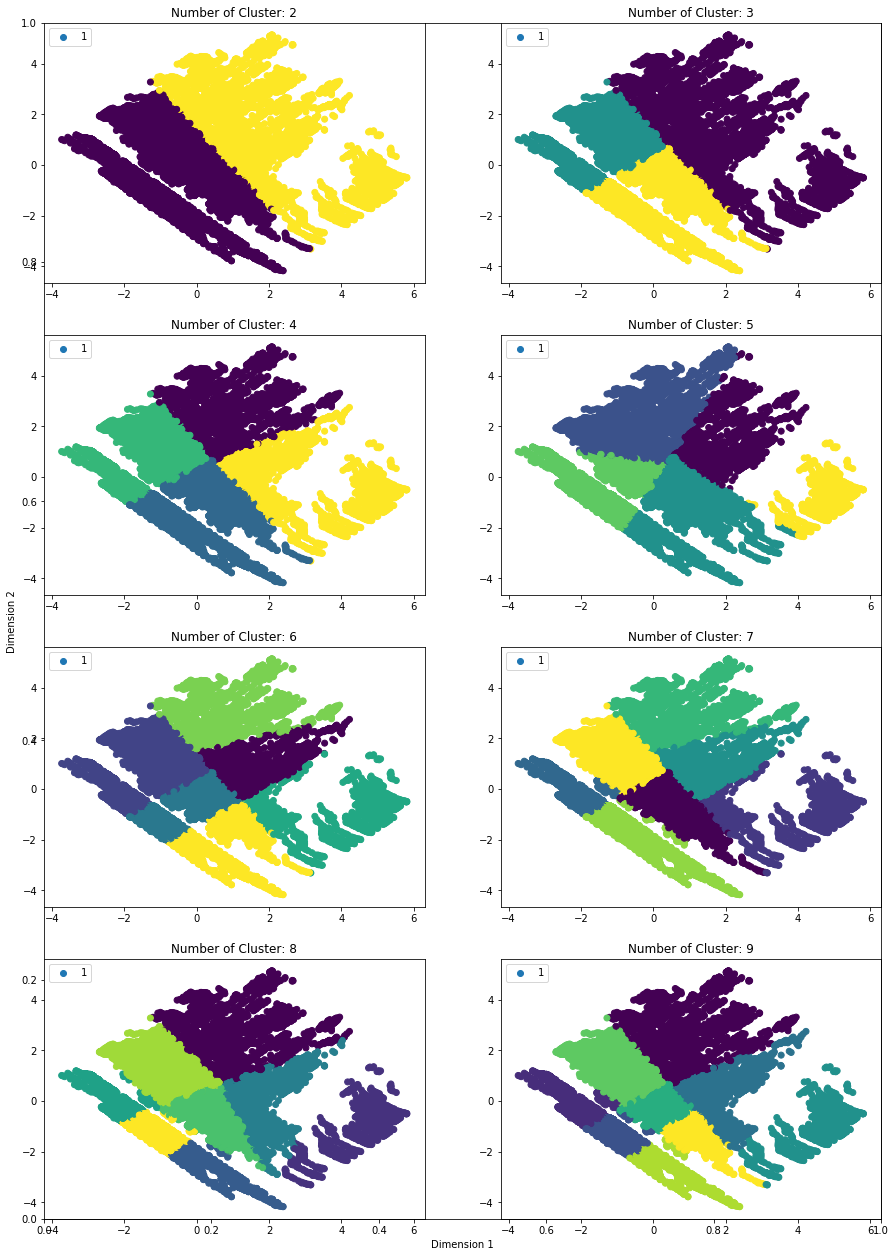

[[1, array([99664.95625037])], [2, array([68283.55471667])], [3, array([50535.85960278])], [4, array([45179.76921749])], [5, array([36968.17619207])], [6, array([31150.3735808])], [7, array([26416.96759284])], [8, array([23451.03557167])]]


In [52]:
# 2D
seq = 1
fig = plt.figure(figsize=(15, 22))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
results = []
for i in range(k):
    centList, myNewAssments = kmeans.biKmeans(dataMat, i+2)
    sse = sum(myNewAssments[:,1].A)
    results.append([i+1, sse])
    label = myNewAssments[:, 0].A
    df_col = pd.DataFrame({'key':label[:,0]})
    ax = fig.add_subplot(4, 2, seq)
    ax.set_title('Number of Cluster: %d' % int(i+2))
    ax.scatter(Xk.iloc[:,0], Xk.iloc[:,1],c=df_col['key'])
    ax.legend(loc="upper left")
#     kmeans.showCluster(dataMat,i,centList, myNewAssments)
    seq += 1
plt.show()
print(results)

In [54]:
results

[[1, array([99664.95625037])],
 [2, array([68283.55471667])],
 [3, array([50535.85960278])],
 [4, array([45179.76921749])],
 [5, array([36968.17619207])],
 [6, array([31150.3735808])],
 [7, array([26416.96759284])],
 [8, array([23451.03557167])]]